<a href="https://colab.research.google.com/github/hochaeAidl/ai-middle-course/blob/master/02_05_csv_file_handling_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **실습 2-4 : File handling**


- *Colab의 /content/sample_data directory 안에 있는 mnist csv file을 읽어 출력해 본다*


## **Sample_data 안의 내용을 확인**

In [1]:
!pwd
!ls -al sample_data/

/content
total 55512
drwxr-xr-x 1 root root     4096 Dec  6 16:53 .
drwxr-xr-x 1 root root     4096 Dec  6 16:53 ..
-rwxr-xr-x 1 root root     1697 Jan  1  2000 anscombe.json
-rw-r--r-- 1 root root   301141 Dec  6 16:53 california_housing_test.csv
-rw-r--r-- 1 root root  1706430 Dec  6 16:53 california_housing_train.csv
-rw-r--r-- 1 root root 18289443 Dec  6 16:53 mnist_test.csv
-rw-r--r-- 1 root root 36523880 Dec  6 16:53 mnist_train_small.csv
-rwxr-xr-x 1 root root      930 Jan  1  2000 README.md


## **Import Module**

In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


TensorFlow 2.x selected.


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools

import numpy as np
import tensorflow as tf

## **Mount**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## **Import aidlutils**

In [0]:
import sys
sys.path.append('/content/drive/Shared drives/scsa_2019_e/aidl-utils/basic')

## **CSV file structure**

- *첫 column = label*
- *나머지 = 이미지 데이타*


In [6]:
!head {'/content/sample_data/mnist_train_small.csv'} #shell cmd 사용

6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,67,67,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,131,252,252,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,159,250,232,30,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,222,252,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,147,252,183,5,0,0,0,0,0,0,0,20,89,89,73,0,0,0,0,0,0,0,0,0,0,0,0,48,247,252,159,0,0,0,0,0,0,0,79,236,252,252,249,198,16,0,0,0,0,0,0,0,0,0,41,193,252,199,22,0,0,0,0,0,12,135,248,252,252,252,252,252,100,0,0,0,0,0,0,0,0,0,100,252,252,88,0,0,0,0,0,11,171,252,252,235,175,178,252,252,224,0,0,0,0,0,0,0,0,15,209,252,233,12,0,0,0,0,49,177,252,252,89,26,0,2,166,252,252,0,0,0,0,0,0,0,0,96,253,253,59,0,0,0,0,11,177,255,253,92,0,0,0,0,155,253,128,0,0,0,0,0,0,0,0,143,252,252,10,0,0,0,12,171,252,216,110,13,0,0,0,3,180,

In [0]:
mnist_csv_train = '/content/sample_data/mnist_train_small.csv'
minst_csv_test = '/content/sample_data/mnist_test.csv'

In [0]:
import numpy as np

In [0]:
data_train=np.loadtxt(mnist_csv_train, delimiter=',') #delimiter지정필요
data_test=np.loadtxt(minst_csv_test, delimiter=',')

In [10]:
data_train.shape,data_test.shape, type(data_train)

((20000, 785), (10000, 785), numpy.ndarray)

In [0]:
x_train, y_train = data_train[:, 1:], data_train[:, 0] # label 줄을 떼고 처리해 준 것.
x_test, y_test = data_test[:, 1:], data_test[:, 0]

In [13]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape, d

((20000, 784), (20000,), (10000, 784), (10000,), (20000, 785))

### Pandas module로 읽기

In [0]:
import pandas as pd

In [0]:
data_train = pd.read_csv(mnist_csv_train, header=None) # header주의. 디폴트 밸류가 헤더를 삭제하는 거니까, 헤더 세팅을 해줘야한다.
data_test = pd.read_csv(minst_csv_test, header=None)

In [16]:
data_train.shape, data_test.shape,type(data_train)

((20000, 785), (10000, 785), pandas.core.frame.DataFrame)

In [17]:
data_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
#train
y_train = np.array(data_train.iloc[:, 0]) # Data type 변경
x_train = np.array(data_train.iloc[:, 1:])

#test
y_test = np.array(data_test.iloc[:, 0])
x_test = np.array(data_test.iloc[:, 1:])

#features
n_features_train = x_train.shape[1]
n_samples_train = x_train.shape[0]
n_features_test = x_test.shape[1]
n_samples_test = x_test.shape[0]
print(n_features_train, n_samples_train, n_features_test, n_samples_test)
print(x_train.shape, y_train.shape, x_test.shape, type(x_train))

784 20000 784 10000
(20000, 784) (20000,) (10000, 784) <class 'numpy.ndarray'>


## **Show_img(): mnist image**

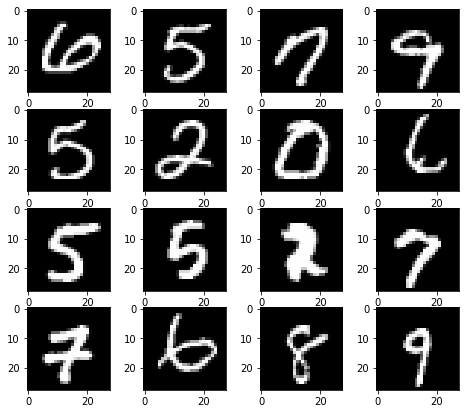

In [19]:
import matplotlib.pyplot as plt
import aidlutils as aidl

aidl.show_img(x_train)

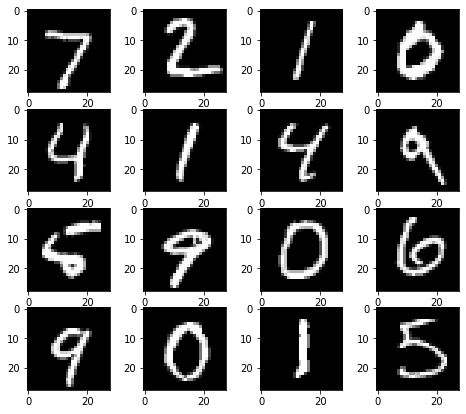

In [20]:
aidl.show_img(x_test)

## **실습 과제**

### 과제1 이 dataset을 오늘 실습한 model로 training해 보자.
#### -- 02_03 코드를 02_03_01로 복사하고 Data set을 위에 있는 np.loadtxt()를 사용하도록 수정하여 실행하자.





In [21]:
x_train, x_test = x_train / 255.0, x_test / 255.0
print (x_train.shape)

(20000, 784)


In [22]:
# add a channel dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

x_train.shape, x_test.shape

((20000, 784, 1), (10000, 784, 1))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_32 (Conv1D)             (None, 784, 32)           128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 392, 32)           0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                125450    
Total params: 125,578
Trainable params: 125,578
Non-trainable params: 0
_________________________________________________________________


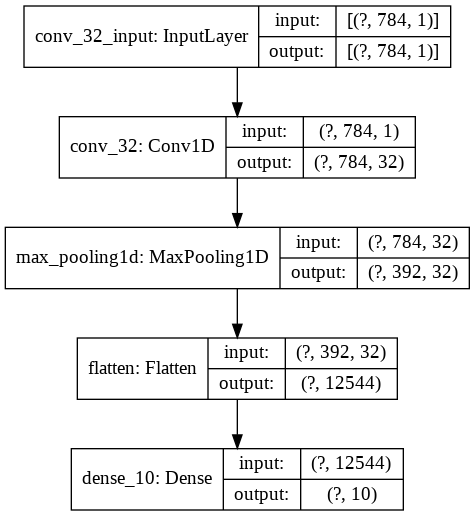

In [29]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(32, 3, padding='same', activation='relu', 
                         input_shape=(784, 1), name='conv_32'), # conv layer에서는 4D이기 때문에 무조건 확장해줘야함
  tf.keras.layers.MaxPool1D(pool_size=2, strides=2),
  tf.keras.layers.Flatten(name='flatten'),
  tf.keras.layers.Dense(10, activation='softmax', name='dense_10')
])

model.summary()
tf.keras.utils.plot_model(model, 'my_cnn_model.png', show_shapes=True)

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
%%time
history = model.fit(x_train, y_train, 
                 batch_size=512, epochs=10,
                 validation_data=(x_test, y_test)
                 )

Train on 20000 samples, validate on 10000 samples
Epoch 1/10
20000/20000 [==============================] - 10s 518us/sample - loss: 1.0851 - accuracy: 0.7634 - val_loss: 0.4675 - val_accuracy: 0.8734
Epoch 2/10
20000/20000 [==============================] - 9s 463us/sample - loss: 0.3970 - accuracy: 0.8894 - val_loss: 0.3275 - val_accuracy: 0.9066
Epoch 3/10
20000/20000 [==============================] - 9s 458us/sample - loss: 0.3071 - accuracy: 0.9122 - val_loss: 0.2853 - val_accuracy: 0.9192
Epoch 4/10
20000/20000 [==============================] - 9s 458us/sample - loss: 0.2686 - accuracy: 0.9233 - val_loss: 0.2548 - val_accuracy: 0.9260
Epoch 5/10
20000/20000 [==============================] - 9s 458us/sample - loss: 0.2401 - accuracy: 0.9302 - val_loss: 0.2352 - val_accuracy: 0.9320
Epoch 6/10
20000/20000 [==============================] - 9s 460us/sample - loss: 0.2194 - accuracy: 0.9362 - val_loss: 0.2278 - val_accuracy: 0.9334
Epoch 7/10
20000/20000 [=========================

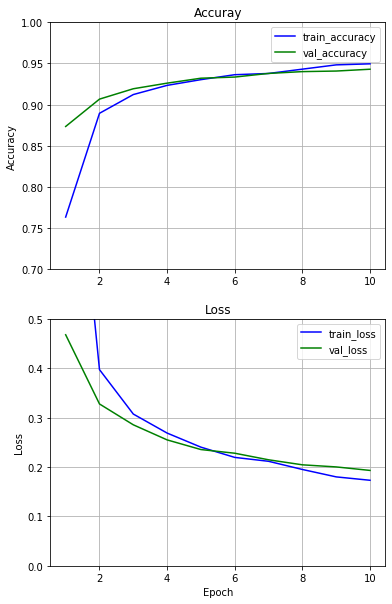

In [32]:
loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(6, 10))
plt.subplot(2, 1, 1)
plt.title('Accuray')
plt.plot(epochs, history.history['accuracy'], 'b', label='train_accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'g', label='val_accuracy')

plt.grid(True)
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.title('Loss')
plt.plot(epochs, history.history['loss'], 'b', label='train_loss')
plt.plot(epochs, history.history['val_loss'], 'g', label='val_loss')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 0.5])
plt.legend(loc='best')
plt.show()

In [38]:
# 데스트셋 첫 이미지 분류
print(model.predict_classes(x_test[1:2, :]))
print (model.predict_classes(x_test[:1, :], verbose=0))

[2]
[7]


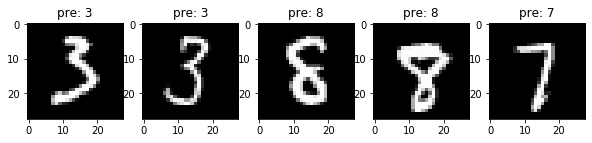

In [33]:
def model_eval(model, n=230):
  #n = 230
  plt.figure(figsize=(10, 2))
  for i in range(5):
    img_idx = n+i
    predict = model.predict(x_test[img_idx:img_idx+1, :])
    img = x_test[img_idx]
    plt.subplot(1,5,i+1)
    plt.imshow(img.reshape((28,28)), cmap='gray')
    plt.title('pre: {}'.format(np.argmax(predict)))

  plt.show()

model_eval(model)